In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import re
pd.set_option('display.max_columns', None)
import networkx as nx


In [ ]:
df_all_cunhas = pd.read_excel('/content/drive/MyDrive/grafos/all_cunhas_2024.xlsx')
df_all_cunhas.sort_values('Vantagens (Bruto)', ascending=False, inplace=True)
df_all_cunhas.drop_duplicates(subset='Servidor', keep='first', inplace=True)


In [ ]:
df_all_limas = pd.read_excel('/content/drive/MyDrive/grafos/all_limas_2022.xlsx')
df_all_limas.sort_values('Vantagens (Bruto)', ascending=False, inplace=True)
df_all_limas.drop_duplicates(subset='Servidor', keep='first', inplace=True)

In [ ]:
df_todos = pd.concat([df_all_cunhas, df_all_limas])
df_todos.sort_values('Vantagens (Bruto)', ascending=False, inplace=True)
df_todos.drop_duplicates(subset='Servidor', keep='first', inplace=True)
df_todos


,Unidade Gestora,Município,CPF,Servidor,Tipo de Cargo,Cargo,Vantagens (Bruto),Data de admissão,Matrícula
0,Prefeitura Municipal de Campina Grande,Campina Grande,***.138.064-**,Leidson Oliveira Adelino de Lima,À Disposição,Medico - Ced,140098.27,2022-03-31 00:00:00.000,28838
1,Prefeitura Municipal de Campina Grande,Campina Grande,***.798.144-**,Nathalia Lima Sousa Medeiros,Contratação por excepcional interesse público,Medico,125100.00,2020-04-01 00:00:00.000,900000600003167
2,Prefeitura Municipal de Campina Grande,Campina Grande,***.081.934-**,Eduardo Holanda Correia Lima,Comissionado,Diretor Ii - Dr2,110044.91,2016-04-01 00:00:00.000,25200
3,Prefeitura Municipal de Campina Grande,Campina Grande,***.550.267-**,Ronaldo da Cunha Lima Filho,Comissionado,Secretario Municipal - Sm1,97333.34,2023-10-17 00:00:00.000,30048
4,Prefeitura Municipal de Campina Grande,Campina Grande,***.296.844-**,Germana Cunha Lima Ramos,Comissionado,Coordenador Municipal - Gs1,65193.53,1984-02-01 00:00:00.000,4944
...,...,...,...,...,...,...,...,...,...
1100,Prefeitura Municipal de Campina Grande,Campina Grande,***.822.914-**,Mikael Rodrigo Ferreira de Lima,Contratação por excepcional interesse público,Vigia,706.00,2024-05-01 00:00:00.000,300107754
1102,Prefeitura Municipal de Campina Grande,Campina Grande,***.636.024-**,Aimberkson Alves de Lima Arruda,Contratação por excepcional interesse público,Tecnico Em Enfermagem,517.73,2024-06-20 00:00:00.000,900000500062413
1103,Prefeitura Municipal de Campina Grande,Campina Grande,***.818.484-**,Larissa Lima Alves,Contratação por excepcional interesse público,Enfermeiro - Esf,460.00,2024-06-25 00:00:00.000,900000500062449
1104,Prefeitura Municipal de Campina Grande,Campina Grande,***.065.424-**,Elaine Cristina de Lima Santos,Contratação por excepcional interesse público,Auxiliar de Servicos Gerais-ps,308.00,2015-04-01 00:00:00.000,300002687


In [ ]:
# prompt: calcule o terceiro quartil de Vantagens (Bruto). depois crie uma coluna chamada: recebeMais e coloque True na linha que tiver Vantagens (Bruto) >= ao terceiro quartil

terceiro_quartil = df_todos['Vantagens (Bruto)'].quantile(0.75)
df_todos['recebeMais'] = df_todos['Vantagens (Bruto)'] >= terceiro_quartil
terceiro_quartil


16525.65

In [ ]:
df_todos

,Unidade Gestora,Município,CPF,Servidor,Tipo de Cargo,Cargo,Vantagens (Bruto),Data de admissão,Matrícula,recebeMais
0,Prefeitura Municipal de Campina Grande,Campina Grande,***.138.064-**,Leidson Oliveira Adelino de Lima,À Disposição,Medico - Ced,140098.27,2022-03-31 00:00:00.000,28838,True
1,Prefeitura Municipal de Campina Grande,Campina Grande,***.798.144-**,Nathalia Lima Sousa Medeiros,Contratação por excepcional interesse público,Medico,125100.00,2020-04-01 00:00:00.000,900000600003167,True
2,Prefeitura Municipal de Campina Grande,Campina Grande,***.081.934-**,Eduardo Holanda Correia Lima,Comissionado,Diretor Ii - Dr2,110044.91,2016-04-01 00:00:00.000,25200,True
3,Prefeitura Municipal de Campina Grande,Campina Grande,***.550.267-**,Ronaldo da Cunha Lima Filho,Comissionado,Secretario Municipal - Sm1,97333.34,2023-10-17 00:00:00.000,30048,True
4,Prefeitura Municipal de Campina Grande,Campina Grande,***.296.844-**,Germana Cunha Lima Ramos,Comissionado,Coordenador Municipal - Gs1,65193.53,1984-02-01 00:00:00.000,4944,True
...,...,...,...,...,...,...,...,...,...,...
1100,Prefeitura Municipal de Campina Grande,Campina Grande,***.822.914-**,Mikael Rodrigo Ferreira de Lima,Contratação por excepcional interesse público,Vigia,706.00,2024-05-01 00:00:00.000,300107754,False
1102,Prefeitura Municipal de Campina Grande,Campina Grande,***.636.024-**,Aimberkson Alves de Lima Arruda,Contratação por excepcional interesse público,Tecnico Em Enfermagem,517.73,2024-06-20 00:00:00.000,900000500062413,False
1103,Prefeitura Municipal de Campina Grande,Campina Grande,***.818.484-**,Larissa Lima Alves,Contratação por excepcional interesse público,Enfermeiro - Esf,460.00,2024-06-25 00:00:00.000,900000500062449,False
1104,Prefeitura Municipal de Campina Grande,Campina Grande,***.065.424-**,Elaine Cristina de Lima Santos,Contratação por excepcional interesse público,Auxiliar de Servicos Gerais-ps,308.00,2015-04-01 00:00:00.000,300002687,False


In [ ]:
G = nx.Graph()

G.add_node('BRUNO CUNHA LIMA', nome = 'BRUNO CUNHA LIMA', cor='orange')

# adiciona vertice
for _, row in df_todos.iterrows():
  if(row['recebeMais'] and
     (('CUNHA' in row['Servidor'].upper().rstrip() and 'LIMA' in row['Servidor'].upper().rstrip())
      or 'LIMA' in row['Servidor'].upper().rstrip())):
    G.add_node(row['Servidor'].upper().rstrip(), nome = row['Servidor'].upper().rstrip(), cor='red')
  elif(('CUNHA' in row['Servidor'].upper().rstrip() and 'LIMA' in row['Servidor'].upper().rstrip())
      or 'LIMA' in row['Servidor'].upper().rstrip()):
    G.add_node(row['Servidor'].upper().rstrip(), nome = row['Servidor'].upper().rstrip(), cor='blue')

# adiciona aresta
for _, row in df_todos.iterrows():
  if('CUNHA' in row['Servidor'].upper().rstrip() and 'LIMA' in row['Servidor'].upper().rstrip()): # Use the 'in' keyword to check for substrings
    G.add_edge(row['Servidor'].upper().rstrip(), 'BRUNO CUNHA LIMA', peso=4)
    print("Cunha Lima: ",  row['Servidor'].upper().rstrip())

  elif 'LIMA' in row['Servidor'].upper().rstrip():
    G.add_edge(row['Servidor'].upper().rstrip(), 'BRUNO CUNHA LIMA', peso=1)

count = 0
for node in G.nodes(data=True):
  if node[1]['cor'] == 'red':
    count += 1
print("recebe mais: ", count)



Cunha Lima:  RONALDO DA CUNHA LIMA FILHO
Cunha Lima:  GERMANA CUNHA LIMA RAMOS
Cunha Lima:  LISMARCIA FELISBERTO DA CUNHA LIMA
Cunha Lima:  ALEXANDRE CUNHA LIMA DE OLIVEIRA
Cunha Lima:  RICARDO CUNHA LIMA RAMOS DE MENEZES
Cunha Lima:  GUSTAVO DA SILVA CUNHA LIMA
Cunha Lima:  ALANE VANESSA LIMA DA CUNHA MACHADO
recebe mais:  171


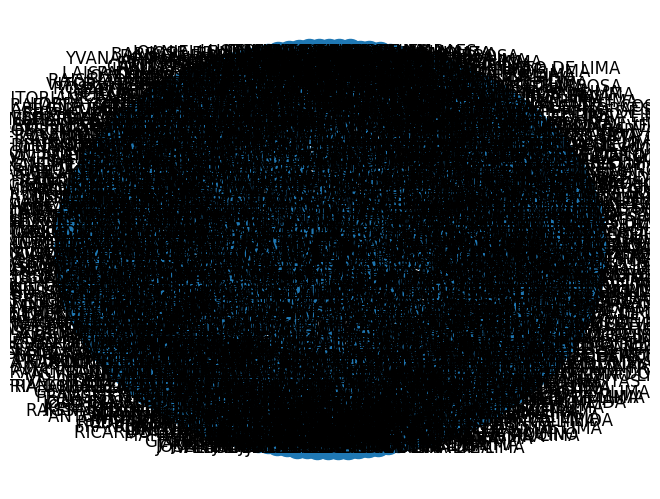

In [ ]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True)

In [ ]:
nx.write_graphml(G, "grafo_all_limas.graphml")
from google.colab import files
files.download('grafo_all_limas.graphml')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

_________________________________________________ relacionando LUCAS RIBEIRO NOVAIS ARAUJO

In [ ]:
df_all_ribeiros = pd.read_excel('/content/drive/MyDrive/grafos/all_ribeiro.xlsx')
df_all_ribeiros.sort_values('Vantagens (Bruto)', ascending=False, inplace=True)
df_all_ribeiros.drop_duplicates(subset='Servidor', keep='first', inplace=True)


In [ ]:
df_all_novais = pd.read_excel('/content/drive/MyDrive/grafos/all_novais.xlsx')
df_all_novais.sort_values('Vantagens (Bruto)', ascending=False, inplace=True)
df_all_novais.drop_duplicates(subset='Servidor', keep='first', inplace=True)

In [ ]:
df_all_araujo = pd.read_excel('/content/drive/MyDrive/grafos/all_araujo.xlsx')
df_all_araujo.sort_values('Vantagens (Bruto)', ascending=False, inplace=True)
df_all_araujo.drop_duplicates(subset='Servidor', keep='first', inplace=True)

In [ ]:
df_todos = pd.concat([df_all_ribeiros, df_all_novais, df_all_araujo])
df_todos.sort_values('Vantagens (Bruto)', ascending=False, inplace=True)
df_todos.drop_duplicates(subset='Servidor', keep='first', inplace=True)
df_todos

,Unidade Gestora,Município,CPF,Servidor,Tipo de Cargo,Cargo,Vantagens (Bruto),Data de admissão,Matrícula
0,Prefeitura Municipal de Campina Grande,Campina Grande,***.870.004-**,Kamilla Emanuelly Araujo Cirne,Comissionado,Secretario Executivo de Atencao Primaria - Sme,113258.12,2022-01-01 00:00:00.000,28673
1,Prefeitura Municipal de Campina Grande,Campina Grande,***.078.104-**,Ricardo Araujo de Melo,Comissionado,Gerente Ii - Gr2,111068.93,1979-11-01 00:00:00.000,1548
2,Prefeitura Municipal de Campina Grande,Campina Grande,***.308.464-**,Felix Araujo Neto,Comissionado,Secretario Municipal - Sm1,110993.29,2021-01-01 00:00:00.000,27658
0,Superintendência de Transportes Públicos de Ca...,Campina Grande,***.418.774-**,Vitor Matheus Ribeiro Felix,Comissionado,Superintendente,97313.46,2023-10-01 00:00:00.000,111450
1,Prefeitura Municipal de Campina Grande,Campina Grande,***.780.364-**,Brenda Ribeiro Siqueira,Contratação por excepcional interesse público,Medico Pss - Hca,92745.80,2023-07-01 00:00:00.000,900000600006071
...,...,...,...,...,...,...,...,...,...
1124,Prefeitura Municipal de Campina Grande,Campina Grande,***.692.634-**,Anderson de Araujo Farias,Contratação por excepcional interesse público,Auxiliar de Servicos Gerais,988.40,2024-06-10 00:00:00.000,900000500062354
1130,Agência Municipal de Desenvolvimento de Campin...,Campina Grande,***.042.115-**,Diana Cristina Araujo Motta,Contratação por excepcional interesse público,Assistente Administrativo,642.86,2024-02-20 00:00:00.000,1483
1131,Prefeitura Municipal de Campina Grande,Campina Grande,***.506.944-**,Dayane Araujo Souza,Contratação por excepcional interesse público,Educador Social,596.12,2023-10-02 00:00:00.000,100000002367572
1132,Prefeitura Municipal de Campina Grande,Campina Grande,***.309.744-**,Darlan Vieira de Araujo Fonteles,Contratação por excepcional interesse público,Agente de Acao Social,282.40,2024-06-25 00:00:00.000,100000000249130


In [ ]:
# prompt: calcule o terceiro quartil de Vantagens (Bruto). depois crie uma coluna chamada: recebeMais e coloque True na linha que tiver Vantagens (Bruto) >= ao terceiro quartil

terceiro_quartil = df_todos['Vantagens (Bruto)'].quantile(0.75)
df_todos['recebeMais'] = df_todos['Vantagens (Bruto)'] >= terceiro_quartil
terceiro_quartil

16700.0

In [ ]:
df_todos

,Unidade Gestora,Município,CPF,Servidor,Tipo de Cargo,Cargo,Vantagens (Bruto),Data de admissão,Matrícula,recebeMais
0,Prefeitura Municipal de Campina Grande,Campina Grande,***.870.004-**,Kamilla Emanuelly Araujo Cirne,Comissionado,Secretario Executivo de Atencao Primaria - Sme,113258.12,2022-01-01 00:00:00.000,28673,True
1,Prefeitura Municipal de Campina Grande,Campina Grande,***.078.104-**,Ricardo Araujo de Melo,Comissionado,Gerente Ii - Gr2,111068.93,1979-11-01 00:00:00.000,1548,True
2,Prefeitura Municipal de Campina Grande,Campina Grande,***.308.464-**,Felix Araujo Neto,Comissionado,Secretario Municipal - Sm1,110993.29,2021-01-01 00:00:00.000,27658,True
0,Superintendência de Transportes Públicos de Ca...,Campina Grande,***.418.774-**,Vitor Matheus Ribeiro Felix,Comissionado,Superintendente,97313.46,2023-10-01 00:00:00.000,111450,True
1,Prefeitura Municipal de Campina Grande,Campina Grande,***.780.364-**,Brenda Ribeiro Siqueira,Contratação por excepcional interesse público,Medico Pss - Hca,92745.80,2023-07-01 00:00:00.000,900000600006071,True
...,...,...,...,...,...,...,...,...,...,...
1124,Prefeitura Municipal de Campina Grande,Campina Grande,***.692.634-**,Anderson de Araujo Farias,Contratação por excepcional interesse público,Auxiliar de Servicos Gerais,988.40,2024-06-10 00:00:00.000,900000500062354,False
1130,Agência Municipal de Desenvolvimento de Campin...,Campina Grande,***.042.115-**,Diana Cristina Araujo Motta,Contratação por excepcional interesse público,Assistente Administrativo,642.86,2024-02-20 00:00:00.000,1483,False
1131,Prefeitura Municipal de Campina Grande,Campina Grande,***.506.944-**,Dayane Araujo Souza,Contratação por excepcional interesse público,Educador Social,596.12,2023-10-02 00:00:00.000,100000002367572,False
1132,Prefeitura Municipal de Campina Grande,Campina Grande,***.309.744-**,Darlan Vieira de Araujo Fonteles,Contratação por excepcional interesse público,Agente de Acao Social,282.40,2024-06-25 00:00:00.000,100000000249130,False


In [ ]:
G = nx.Graph()

G.add_node('LUCAS RIBEIRO NOVAIS ARAUJO', nome = 'LUCAS RIBEIRO NOVAIS ARAUJO', cor='orange')

# adiciona vertice
for _, row in df_todos.iterrows():
  if(row['recebeMais']):
    G.add_node(row['Servidor'].upper().rstrip(), nome = row['Servidor'].upper().rstrip(), cor='red')
  else:
    G.add_node(row['Servidor'].upper().rstrip(), nome = row['Servidor'].upper().rstrip(), cor='blue')

# adiciona aresta
for _, row in df_todos.iterrows():
  if('RIBEIRO' in row['Servidor'].upper().rstrip() and
     'NOVAIS' in row['Servidor'].upper().rstrip() and
     'ARAUJO' in row['Servidor'].upper().rstrip()): # Use the 'in' keyword to check for substrings
    G.add_edge(row['Servidor'].upper().rstrip(), 'LUCAS RIBEIRO NOVAIS ARAUJO', peso=6)
    print("6:", row['Servidor'].upper().rstrip())
  elif(('RIBEIRO' in row['Servidor'].upper().rstrip() and 'NOVAIS' in row['Servidor'].upper().rstrip())
  or ('RIBEIRO' in row['Servidor'].upper().rstrip() and 'ARAUJO' in row['Servidor'].upper().rstrip())
  or ('NOVAIS' in row['Servidor'].upper().rstrip() and 'ARAUJO' in row['Servidor'].upper().rstrip())):
    G.add_edge(row['Servidor'].upper().rstrip(), 'LUCAS RIBEIRO NOVAIS ARAUJO', peso=4)
    print(row['Servidor'].upper().rstrip())
  else:
    G.add_edge(row['Servidor'].upper().rstrip(), 'LUCAS RIBEIRO NOVAIS ARAUJO', peso=1)

count = 0
for node in G.nodes(data=True):
  if node[1]['cor'] == 'red':
    count += 1
print("recebe mais: ", count)


# Count edges with weight 6
count_weight_6 = 0
# Count edges with weight 4
count_weight_4 = 0
for neighbor, attributes in G['LUCAS RIBEIRO NOVAIS ARAUJO'].items():
    if attributes['peso'] == 6:
        count_weight_6 += 1
    elif attributes['peso'] == 4:
        count_weight_4 += 1

print("Edges with weight 6:", count_weight_6)
print("Edges with weight 4:", count_weight_4)


ANDRE RIBEIRO ARAUJO DE MENEZES
JOSEFA SALETE DE ARAUJO RIBEIRO
GABRIELA RIBEIRO GOUVEIA DE ARAUJO
GERMANO ARAUJO RIBEIRO
ANA PAULA ARAUJO RIBEIRO DA COSTA
ARTHUR GOMES RIBEIRO ARAUJO
GERMANA DE ARAUJO RIBEIRO
JULYANE DE ARAUJO RIBEIRO
recebe mais:  192
Edges with weight 6: 0
Edges with weight 4: 8


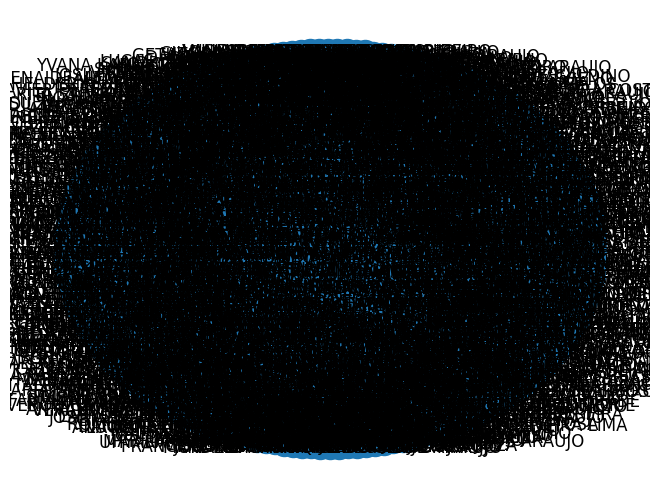

In [ ]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True)

In [ ]:
# nx.write_graphml(G, "grafo_all_ribeiro.graphml")
# from google.colab import files
# files.download("grafo_all_ribeiro.graphml")